# Descomposición de Valores singulares

**Definición**. Sea una $M$ una matriz de $mxn$ con rank r (número de columnas o filas linealmente independientes). Se pueden encontrar matrices $U,\Sigma, V$ tales que

$$M = U \Sigma V^{T}$$

Donde:

$U$ es una matriz _ortonormal_ de mxm

$V^{T}$ es una matriz _ortonormal_ de nxn

$\Sigma$ es una matriz diagonal de mxn. 


A la descomposición anterior se le conoce como _full svd_ (por sus siglas en inglés singular Value Decomposition)

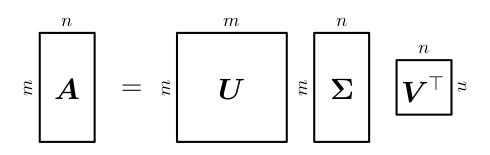

Observaciones. 
* Las columnas vector de $U$ son los vectores singulares izquierdos de $M$
* Las columnas vector de $V^{T}$ son los vectores singulares derechos de $M$
* Los elementos de la diagonal de $\Sigma$ denotados por $\sigma_{i}$ se les conoce como _valores singulares_ de $M$ y por convención  $\sigma_{1}\geq\sigma_{2}\geq\cdots\geq\sigma_{r}$

Notar que la matriz $\Sigma$ es del mismo tamaño que $M$. Entonces si $M$ es rectangular va a existir una submatriz cuadrada y diagonal en $\Sigma$ con los valores singulares y una submatriz de ceros para completar la matriz $\Sigma$. Así entonces podemos regresentar la descomposición SVD en su forma _thin_ ocupando una matiz $\Sigma$ reducida.

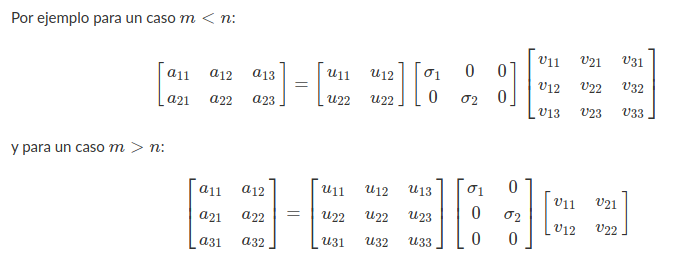

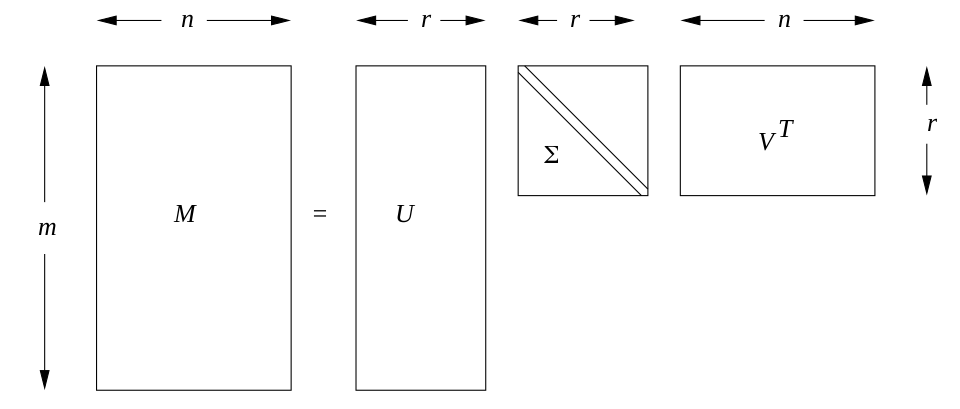

La interpretación geometrica de la _SVD_ es la siguiente: 

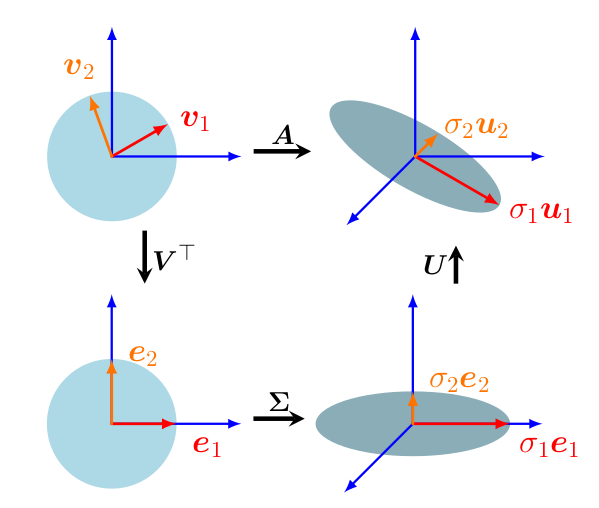

## Ejemplo caso:  m > n

### Modulos

In [1]:
# Importar librerías
import numpy as np
import pandas as pd 
from sklearn import datasets


import matplotlib.pyplot as plt
from PIL import Image

### Datos

In [3]:
# Caso 1
# Leer el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :4]

In [4]:
X.shape

(150, 4)

**Importante**. Conocer tus datos

### Calcular Full SVD

In [34]:
U, S, Vt = np.linalg.svd(X)

In [6]:
print(U.shape)
print(S.shape)
print(Vt.shape)

(150, 150)
(4,)
(4, 4)


In [7]:
# Calcular SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

In [8]:
print(U.shape)
print(S.shape)
print(Vt.shape)

(150, 4)
(4,)
(4, 4)


In [9]:
print(U)

[[-6.16168450e-02  1.29611444e-01  2.13859674e-03  1.63819140e-03]
 [-5.80709402e-02  1.11019776e-01  7.06723871e-02  5.17569646e-02]
 [-5.67630474e-02  1.17966465e-01  4.34254909e-03  9.55702427e-03]
 [-5.66534426e-02  1.05308145e-01  5.92467197e-03 -4.16438911e-02]
 [-6.12302023e-02  1.31089790e-01 -3.18810953e-02 -3.22148124e-02]
 [-6.75031684e-02  1.30884835e-01 -6.85371918e-02 -1.13642477e-02]
 [-5.74820774e-02  1.16598182e-01 -6.64136685e-02 -2.67433923e-02]
 [-6.09726328e-02  1.20943120e-01  5.43026565e-03 -2.40566566e-02]
 [-5.37611959e-02  9.99414853e-02  1.76366479e-02 -1.65153852e-02]
 [-5.88266594e-02  1.12043088e-01  6.49689136e-02 -3.04719804e-02]
 [-6.52918230e-02  1.36578094e-01  4.93585934e-03 -6.46942221e-03]
 [-5.99417779e-02  1.13753142e-01 -2.52977575e-02 -8.36045085e-02]
 [-5.71132323e-02  1.11354756e-01  7.16796746e-02 -5.15469382e-03]
 [-5.15957540e-02  1.15324791e-01  4.26212003e-03 -1.37409532e-02]
 [-6.80071908e-02  1.64183057e-01  9.57009112e-03  8.76360142e

In [10]:
print(np.diag(S))

[[95.95991387  0.          0.          0.        ]
 [ 0.         17.76103366  0.          0.        ]
 [ 0.          0.          3.46093093  0.        ]
 [ 0.          0.          0.          1.88482631]]


In [11]:
print(Vt)

[[-0.75110816 -0.38008617 -0.51300886 -0.16790754]
 [ 0.2841749   0.5467445  -0.70866455 -0.34367081]
 [ 0.50215472 -0.67524332 -0.05916621 -0.53701625]
 [ 0.32081425 -0.31725607 -0.48074507  0.75187165]]


### Comprobación descomposición

In [12]:
sum(np.round((X - U@(np.diag(S))@Vt),4))

array([0., 0., 0., 0.])

In [13]:
U.T@U

array([[ 1.00000000e+00,  0.00000000e+00, -5.55111512e-17,
        -6.24500451e-17],
       [ 0.00000000e+00,  1.00000000e+00, -5.55111512e-17,
         3.29597460e-17],
       [-5.55111512e-17, -5.55111512e-17,  1.00000000e+00,
         2.35922393e-16],
       [-6.24500451e-17,  3.29597460e-17,  2.35922393e-16,
         1.00000000e+00]])

In [14]:
U@U.T

array([[ 2.06030192e-02,  1.82035092e-02,  1.88123070e-02, ...,
        -6.32069856e-04, -1.84209073e-03, -1.57384282e-03],
       [ 1.82035092e-02,  2.33709945e-02,  1.71944350e-02, ...,
         7.74162264e-04, -1.45708223e-02, -1.16763530e-02],
       [ 1.88123070e-02,  1.71944350e-02,  1.72483249e-02, ...,
        -2.24415944e-05, -1.93533397e-03, -2.27507826e-03],
       ...,
       [-6.32069856e-04,  7.74162264e-04, -2.24415944e-05, ...,
         1.83610304e-02,  2.22350701e-02,  8.77276368e-03],
       [-1.84209073e-03, -1.45708223e-02, -1.93533397e-03, ...,
         2.22350701e-02,  5.80476536e-02,  2.97477704e-02],
       [-1.57384282e-03, -1.16763530e-02, -2.27507826e-03, ...,
         8.77276368e-03,  2.97477704e-02,  2.66297715e-02]])

### Aplicaciones

####  Reducción de Dimensionalidad** (Reconstrucción de imagenes)

In [16]:
# Importar imagen
imagen = Image.open('paisaje.jpg')
imagen_gris = imagen.convert('LA')   ## Convertir a escala de grises

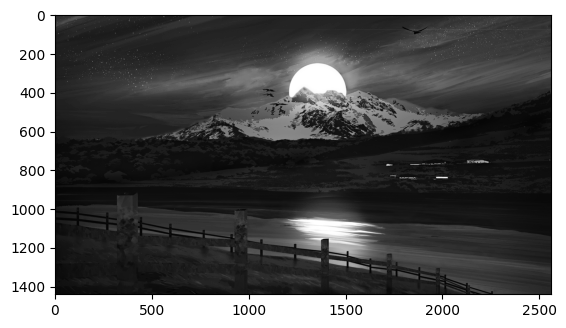

In [17]:
## Convertir la imagen a una matriz

imagen_mat = np.array(list(imagen_gris.getdata(band=0)), float)
imagen_mat.shape = (imagen_gris.size[1], imagen_gris.size[0])
imagen_mat = np.matrix(imagen_mat)

plt.imshow(imagen_mat, cmap='gray')



In [18]:
# Dimensiones de la imagen
imagen_mat.shape

(1440, 2560)

Aproximar la imagen 

In [54]:
# SDV 
U, Sigma, Vt = np.linalg.svd(imagen_mat, full_matrices=False)

Una vez que tenemos la descomposición SVD de una matriz $M$ con rank = r, podemos extraer la aproximación que nos sea útil: una aproximación $M_{k}$ con rank = r (con k < r) se escribe como $M_{k}=U_{k} \Sigma_{k} V^{T}_{k}$  donde $U_{k}$ contiene las primeras k columnas de U, $V_{k}$ las primeras k columnas de V, y $\Sigma_{k}$ es la submatriz cuadrada k×k de los primeros k renglones y columnas de $\Sigma$ 

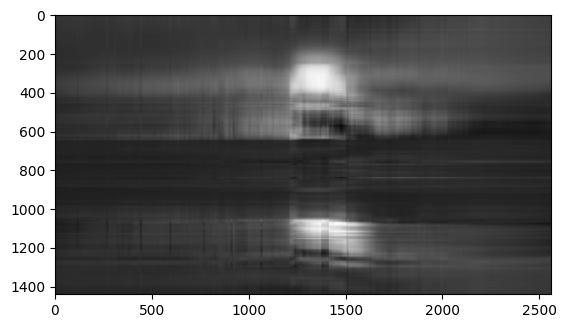

In [57]:
j = 5
matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])
plt.imshow(matriz_equivalente, cmap='gray')

##### Calidad de la aproximación 

In [58]:
1 - (np.linalg.norm(imagen_mat - matriz_equivalente)/np.linalg.norm(imagen_mat))**2

0.9400101983407781

In [74]:
y=[]
for j in range(1,200):
    matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])
    y.append(1 - (np.linalg.norm(imagen_mat - matriz_equivalente)/np.linalg.norm(imagen_mat))**2)

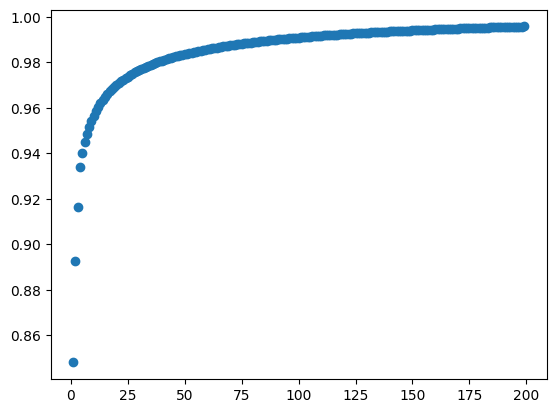

In [75]:
plt.scatter(x= list(range(1,200)), y=y)

#### Solución de Sistemas de ecuaciones (Pseudo-Inversa)

La Inversa de una Matriz A se puede calcular a partir de su descomposición SVD por medio de:

$$A^{-1}=V \Sigma^{-1} U^{T}$$

In [26]:
A = np.array([[3,4],[1,5]])
A

array([[3, 4],
       [1, 5]])

In [27]:
A_1= np.linalg.inv(A)
A_1

array([[ 0.45454545, -0.36363636],
       [-0.09090909,  0.27272727]])

In [28]:
def pseudoinversa(M):
    U, S, Vt = np.linalg.svd(M, full_matrices = True)
    peudoinversa =  Vt.T@(np.diag(1/S))@U.T
    return peudoinversa

In [29]:
B = pseudoinversa(A)
B

array([[ 0.45454545, -0.36363636],
       [-0.09090909,  0.27272727]])

In [30]:
np.round(A@A_1,8)

array([[ 1.,  0.],
       [-0.,  1.]])

In [31]:
np.round(A@B,8)

array([[ 1.,  0.],
       [-0.,  1.]])

In [25]:
B@A

array([[1., 0.],
       [0., 1.]])

### Ejercicio

In [33]:
A = [[5,0,0,0,5,0],[5,5,5,1,0,0],[0,0,0,0,4,5],[0,3,0,0,0,3]]

In [38]:
S1

array([9.82405621, 7.34404588, 5.62162577, 1.71762432])

In [43]:
U1, S1, Vt1 = np.linalg.svd(A)

In [59]:
U1

array([[ 0.52876094,  0.41132451,  0.65426334,  0.35094657],
       [ 0.78870585, -0.52634177, -0.15900106, -0.27500199],
       [ 0.24380627,  0.73885551, -0.40308339, -0.48184523],
       [ 0.19726495,  0.08870753, -0.61982411,  0.75434447]])

In [64]:
np.shape(Vt1)

(6, 6)

In [61]:
np.round(Vt1@np.transpose(Vt1))

array([[ 1., -0., -0., -0., -0.,  0.],
       [-0.,  1.,  0.,  0., -0., -0.],
       [-0.,  0.,  1., -0.,  0.,  0.],
       [-0.,  0., -0.,  1., -0., -0.],
       [-0., -0.,  0., -0.,  1.,  0.],
       [ 0., -0.,  0., -0.,  0.,  1.]])

In [62]:
np.round(np.transpose(Vt1)@Vt1)

array([[ 1.,  0.,  0.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0., -0.,  0.],
       [ 0.,  0.,  1.,  0., -0.,  0.],
       [ 0., -0.,  0.,  1.,  0., -0.],
       [ 0., -0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0., -0.,  0.,  1.]])

### Ejemplo clase

 $||A||_{f}^2 = \Sigma \sigma^2$

In [66]:
A2 =np.linalg.norm(A)**2
sigma = np.dot(S1,S1) 

In [68]:
np.round(A2-sigma)

-0.0